In [1]:
import pandas as pd 

In [2]:
df=pd.read_excel('All collected data.xlsx')

In [3]:
df.head()

,Density (Kg/m3),Time (hr),Surface temperature (oC),Fluid temperature (oC),Fluid velocity (m/s),Equivalent diameter (m),Dissolved oxygen (ppmw),Fouling factor (m2 K/kW),Reference
0,797.762,3.333333,202.67,87.0,0.56,0.0147,322.100741,0.0023,"Asomaning, S., 1990. The role of olefins in fo..."
1,797.762,3.666667,202.67,87.0,0.56,0.0147,322.100741,0.0020,"Asomaning, S., 1990. The role of olefins in fo..."
2,797.762,4.000000,203.00,85.5,0.56,0.0147,322.100741,0.0120,"Asomaning, S., 1990. The role of olefins in fo..."
3,797.762,4.333333,204.33,85.0,0.56,0.0147,322.100741,0.0149,"Asomaning, S., 1990. The role of olefins in fo..."
4,797.762,4.666667,205.00,85.0,0.56,0.0147,322.100741,0.0171,"Asomaning, S., 1990. The role of olefins in fo..."


In [4]:
df=df.drop(columns=['Reference'])

In [5]:
df.head()

,Density (Kg/m3),Time (hr),Surface temperature (oC),Fluid temperature (oC),Fluid velocity (m/s),Equivalent diameter (m),Dissolved oxygen (ppmw),Fouling factor (m2 K/kW)
0,797.762,3.333333,202.67,87.0,0.56,0.0147,322.100741,0.0023
1,797.762,3.666667,202.67,87.0,0.56,0.0147,322.100741,0.0020
2,797.762,4.000000,203.00,85.5,0.56,0.0147,322.100741,0.0120
3,797.762,4.333333,204.33,85.0,0.56,0.0147,322.100741,0.0149
4,797.762,4.666667,205.00,85.0,0.56,0.0147,322.100741,0.0171


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

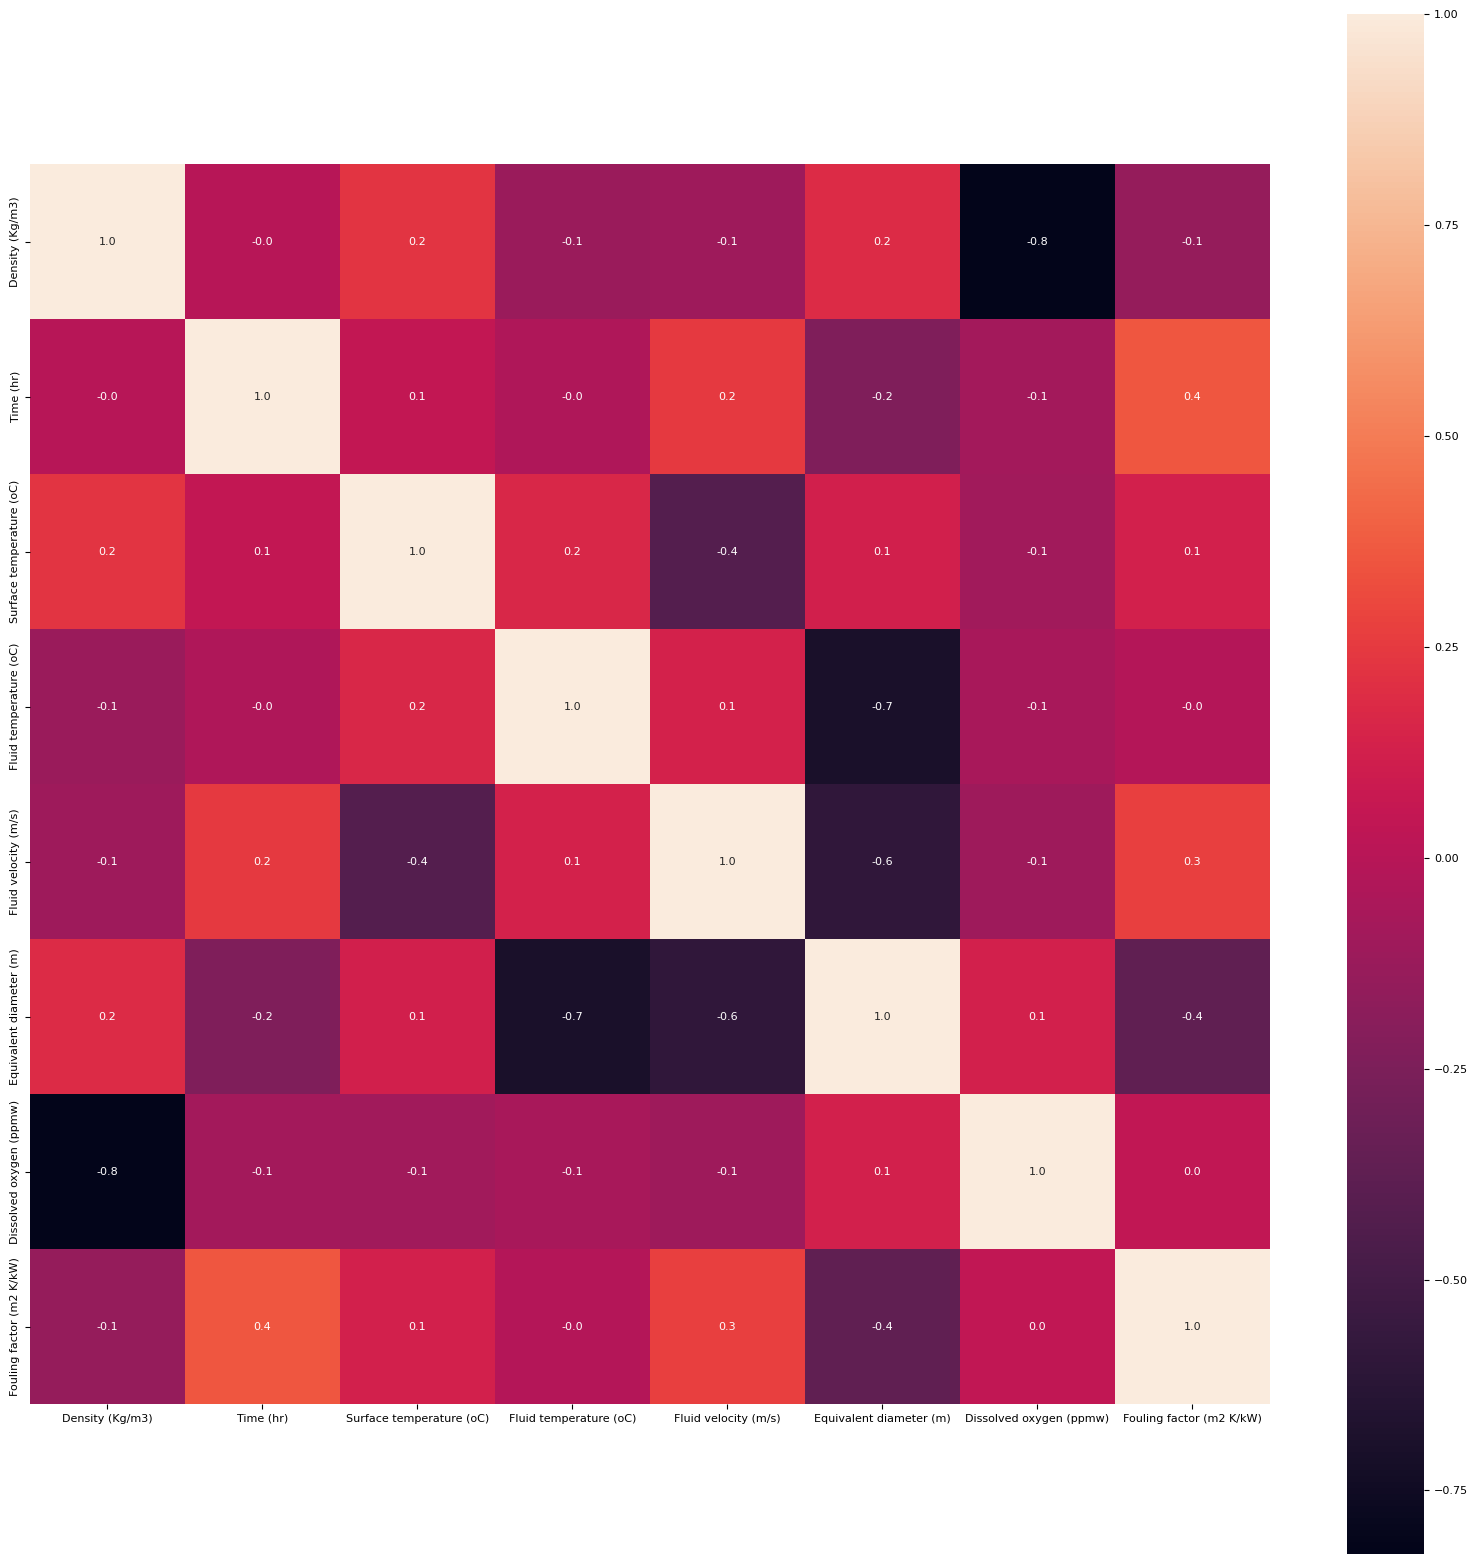

In [291]:
# 热力图
plt.figure(figsize=(20,20))
plt.rcParams.update({"font.size":8})
sns.heatmap(df.corr(),annot=True,fmt='.1f',square=True)
plt.savefig('jjj')
plt.show()

In [6]:
X=df.drop(columns=['Fouling factor (m2 K/kW)'])

In [7]:
y=df['Fouling factor (m2 K/kW)']

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
stand=StandardScaler()

In [10]:
X=stand.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
tx,vx,ty,vy=train_test_split(X,y,test_size=0.2,random_state=666,shuffle=True)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
log=LogisticRegression(C=0.1,n_jobs=-1,multi_class='ovr',random_state=101)

In [15]:
model=log.fit(tx,ty.astype('int'))

In [16]:
yp=model.predict(vx)

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [18]:
MAE=mean_absolute_error(vy,yp)

In [19]:
MAE

0.1522306487510748

In [20]:
MSE=mean_squared_error(vy,yp)

In [21]:
MSE

0.05689969707040319

In [22]:
R2=r2_score(vy,yp)

In [23]:
R2

-0.6162262347069787

In [24]:
import numpy as np

In [25]:
errors = np.abs(vy - yp)
mean_true = np.mean(vy)
RAE = np.mean(errors) / mean_true

In [26]:
RAE

0.9943834185551893

In [27]:
ape = np.abs((vy - yp) / vy)
MAPE = np.mean(ape) * 100

In [28]:
MAPE

99.94316394551991

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf=RandomForestRegressor(n_jobs=-1,random_state=111)

In [31]:
model=rf.fit(tx,ty)

In [32]:
yp=model.predict(vx)

In [33]:
MAE=mean_absolute_error(vy,yp)

In [34]:
MAE

0.004444711450398509

In [35]:
MSE=mean_squared_error(vy,yp)

In [36]:
MSE

0.00013014357169013286

In [37]:
R2=r2_score(vy,yp)

In [38]:
R2

0.9963032939422541

In [39]:
ape = np.abs((vy - yp) / vy)
MAPE = np.mean(ape) * 100

In [40]:
MAPE

16.511961485439148

In [41]:
errors = np.abs(vy - yp)
mean_true = np.mean(vy)
RAE = np.mean(errors) / mean_true

In [42]:
RAE

0.02903322952900086

In [43]:
import xgboost as xgb
# read data into Xgboost DMatrix format
#整体
train = xgb.DMatrix(tx, ty)
test = xgb.DMatrix(vx, vy)

In [44]:
# specify parameters via map
params_xgb={
    'booster':'gbtree',     #  tree-based models
    'objective': 'reg:squarederror', 
    'eval_metric':'rmse',
    'eta': 0.1,             # Same to learning rate
    'gamma':0,              # Similar to min_impurity_decrease in GBDT
    'alpha': 0,            # L1 regularization term on weight (analogous to Lasso regression)
    'lambda': 2,          # L2 regularization term on weights (analogous to Ridge regression)
    'max_depth': 6,         # Same as the max_depth of GBDT
    'subsample': 1,         # Same as the subsample of GBDT
    'colsample_bytree': 1,  # Similar to max_features in GBM
    'min_child_weight': 1,  # minimum sum of instance weight (Hessian) needed in a child
    'nthread':1,            # default to maximum number of threads available if not set
}

In [45]:
watchlist=[(test,'eval')]
num_round = 10000
bst = xgb.train(params_xgb, train, num_round,verbose_eval=50,evals=watchlist,early_stopping_rounds=50)

[0]	eval-rmse:0.35618
[50]	eval-rmse:0.02710
[100]	eval-rmse:0.02011
[150]	eval-rmse:0.01563
[200]	eval-rmse:0.01434
[250]	eval-rmse:0.01343
[300]	eval-rmse:0.01285
[350]	eval-rmse:0.01245
[400]	eval-rmse:0.01215
[450]	eval-rmse:0.01191
[500]	eval-rmse:0.01168
[550]	eval-rmse:0.01158
[600]	eval-rmse:0.01144
[650]	eval-rmse:0.01136
[700]	eval-rmse:0.01125
[750]	eval-rmse:0.01111
[800]	eval-rmse:0.01104
[850]	eval-rmse:0.01098
[900]	eval-rmse:0.01094
[950]	eval-rmse:0.01093
[952]	eval-rmse:0.01093


In [46]:
 yp=bst.predict(test)

In [47]:
MAE=mean_absolute_error(vy,yp)

In [48]:
MAE

0.005428366742202456

In [49]:
MSE=mean_squared_error(vy,yp)

In [50]:
MSE

0.00011953323674257351

In [51]:
R2=r2_score(vy,yp)

In [52]:
R2

0.9966046787049895

In [53]:
ape = np.abs((vy - yp) / vy)
MAPE = np.mean(ape) * 100

In [54]:
MAPE

22.60682082356639

In [55]:
errors = np.abs(vy - yp)
mean_true = np.mean(vy)
RAE = np.mean(errors) / mean_true

In [56]:
RAE

0.03545854873882263

In [57]:
from sklearn.ensemble import BaggingRegressor

In [58]:
bag=BaggingRegressor(n_jobs=-1,random_state=666)

In [59]:
model=bag.fit(tx,ty)

In [60]:
yp=model.predict(vx)

In [61]:
MSE=mean_squared_error(vy,yp)

In [62]:
MSE

0.00016527191352281006

In [63]:
MAE=mean_absolute_error(vy,yp)

In [64]:
MAE

0.004886474757925054

In [65]:
R2=r2_score(vy,yp)

In [66]:
R2

0.9953054793566778

In [67]:
ape = np.abs((vy - yp) / vy)
MAPE = np.mean(ape) * 100

In [68]:
MAPE

15.94535742488479

In [69]:
errors = np.abs(vy - yp)
mean_true = np.mean(vy)
RAE = np.mean(errors) / mean_true

In [70]:
RAE

0.03191886465920911

In [71]:
from sklearn.neighbors import KNeighborsRegressor

In [72]:
KNN=KNeighborsRegressor(n_neighbors=5,n_jobs=-1)

In [73]:
KNN.fit(tx,ty)

KNeighborsRegressor(n_jobs=-1)

In [74]:
yp=KNN.predict(vx)

In [75]:
MAE=mean_absolute_error(vy,yp)

In [76]:
MAE

0.007082085074539027

In [77]:
MSE=mean_squared_error(vy,yp)

In [78]:
MSE

0.0006938132261660094

In [79]:
R2=r2_score(vy,yp)

In [80]:
R2

0.9802923531081597

In [81]:
ape = np.abs((vy - yp) / vy)
MAPE = np.mean(ape) * 100

In [82]:
MAPE

19.185105903353154

In [83]:
errors = np.abs(vy - yp)
mean_true = np.mean(vy)
RAE = np.mean(errors) / mean_true

In [84]:
RAE

0.04626077616232374

In [85]:
from sklearn.linear_model import BayesianRidge

In [86]:
regressor = BayesianRidge()
# 拟合模型
BY=regressor.fit(tx, ty)
# 进行预测
yp = BY.predict(vx)

In [87]:
MAE=mean_absolute_error(vy,yp)

In [88]:
MAE

0.10655215844082608

In [89]:
MSE=mean_squared_error(vy,yp)

In [90]:
MSE

0.022564414219364354

In [91]:
R2=r2_score(vy,yp)

In [92]:
R2

0.35906164514359795

In [93]:
ape = np.abs((vy - yp) / vy)
MAPE = np.mean(ape) * 100

In [94]:
MAPE

537.6997362581784

In [95]:
errors = np.abs(vy - yp)
mean_true = np.mean(vy)
RAE = np.mean(errors) / mean_true

In [96]:
RAE

0.6960076727918085

In [97]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# 定义高斯过程回归模型
kernel = RBF(length_scale=1.0)  # 核函数
regressor = GaussianProcessRegressor(kernel=kernel)

# 拟合模型
regressor.fit(tx,ty)

yp, sigma = regressor.predict(vx, return_std=True)

print("预测结果:", yp)
print("标准差:", sigma)


D:\pyf\conda\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


预测结果: [0. 0. 0. ... 0. 0. 0.]
标准差: [1. 1. 1. ... 1. 1. 1.]


In [98]:
MAE=mean_absolute_error(vy,yp)

In [99]:
MAE

0.1530904939789338

In [100]:
MSE=mean_squared_error(vy,yp)

In [101]:
MSE

0.05864197930600078

In [102]:
R2=r2_score(vy,yp)

In [103]:
R2

-0.6657154657999411

In [104]:
ape = np.abs((vy - yp) / vy)
MAPE = np.mean(ape) * 100

In [105]:
MAPE

100.0

In [106]:
errors = np.abs(vy - yp)
mean_true = np.mean(vy)
RAE = np.mean(errors) / mean_true

In [107]:
RAE

1.0

In [108]:
from sklearn.svm import SVR

In [109]:
svr=SVR().fit(tx,ty)
yp=svr.predict(vx)

In [110]:
MAE=mean_absolute_error(vy,yp)

In [111]:
MAE

0.052201299589503536

In [112]:
MSE=mean_squared_error(vy,yp)

In [113]:
MSE

0.00401467863017593

In [114]:
R2=r2_score(vy,yp)

In [115]:
R2

0.8859637351323805

In [116]:
ape = np.abs((vy - yp) / vy)
MAPE = np.mean(ape) * 100

In [117]:
MAPE

216.61769529533345

In [118]:
errors = np.abs(vy - yp)
mean_true = np.mean(vy)
RAE = np.mean(errors) / mean_true

In [119]:
RAE

0.34098328532852445

In [120]:
#整体
import lightgbm as lgb
train_data = lgb.Dataset(tx, ty)
test_data = lgb.Dataset(vx, vy)

In [121]:
# specify parameters via map
params_lgb = {
    'boost':'gbdt',
    'max_depth': -1,                # Same to max_depth of xgboost 
    'application':'regression',     # Same to objective of xgboost
    'learning_rate': 0.1,           # Same to eta of xgboost
    'lambda_l2': 2,                 # Same to lambda of xgboost
    'min_data_in_leaf': 20,         # Same to min_samples_leaf of GBDT
    'bagging_fraction': 1.0,        # Same to subsample of xgboost
    'feature_fraction': 1.0,         # Same to colsample_bytree of xgboost
    'min_sum_hessian_in_leaf': 1e-3, # Same to min_child_weight of xgboost
    'num_threads': 1,
    'metric':'mae'
}

In [122]:
num_round = 1000
best = lgb.train(params_lgb, train_data, num_round,verbose_eval=50,valid_sets=test_data,early_stopping_rounds=50)

D:\pyf\conda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
D:\pyf\conda\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 834
[LightGBM] [Info] Number of data points in the train set: 9300, number of used features: 7
[LightGBM] [Info] Start training from score 0.150789
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0149937
[100]	valid_0's l1: 0.0108735
[150]	valid_0's l1: 0.00951907
[200]	valid_0's l1: 0.00876773
[250]	valid_0's l1: 0.00832923
[300]	valid_0's l1: 0.00798104
[350]	valid_0's l1: 0.00764383
[400]	valid_0's l1: 0.00742068
[450]	valid_0's l1: 0.0072649
[500]	valid_0's l1: 0.00717573
[550]	valid_0's l1: 0.00702994
[600]	valid_0's l1: 0.00692488
[650]	valid_0's l1: 0.00680148
[700]	valid_0's l1: 0.00670152
[750]	valid_0's l1: 0.00658172
[800]	valid_0's l1: 0.00648156
[850]	valid_0's l1: 0.00642706
[900]	vali

In [126]:
yp=best.predict(vx)

In [127]:
MAE=mean_absolute_error(vy,yp)

In [128]:
MAE

0.006228603685630836

In [129]:
MSE=mean_squared_error(vy,yp)

In [130]:
MSE

0.0002617230603016948

In [131]:
R2=r2_score(vy,yp)

In [132]:
R2

0.9925658009081488

In [133]:
ape = np.abs((vy - yp) / vy)
MAPE = np.mean(ape) * 100

In [134]:
MAPE

27.66026784476988

In [140]:
errors = np.abs(vy - yp)
mean_true = np.mean(vy)
RAE = np.mean(errors) / mean_true

In [136]:
RAE

0.04068576384950414

In [137]:
from sklearn.neural_network import MLPRegressor

In [138]:
MLP=MLPRegressor(hidden_layer_sizes=(100,50),activation='relu',solver='adam')

In [139]:
MLP.fit(tx,ty)

MLPRegressor(hidden_layer_sizes=(100, 50))

In [141]:
yp=MLP.predict(vx)

In [142]:
MAE=mean_absolute_error(vy,yp)

In [143]:
MAE

0.026285553195152196

In [144]:
MSE=mean_squared_error(vy,yp)

In [145]:
MSE

0.001902416133351428

In [146]:
R2=r2_score(vy,yp)

In [147]:
R2

0.9459621927292873

In [148]:
ape = np.abs((vy - yp) / vy)
MAPE = np.mean(ape) * 100

In [149]:
MAPE

64.09524734769681

In [150]:
errors = np.abs(vy - yp)
mean_true = np.mean(vy)
RAE = np.mean(errors) / mean_true

In [151]:
RAE

0.1716994472483004

In [224]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,SimpleRNN,GRU
from tensorflow.keras.optimizers import Adam

In [155]:
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(7,1)))
model.add(Dense(units=1))

# 编译模型
model.compile(optimizer=Adam(), loss='mean_squared_error')

In [157]:
model.fit(tx, ty, epochs=150, batch_size=32)

Epoch 1/150
291/291 [==============================] - 1s 2ms/step - loss: 0.0021
Epoch 2/150
291/291 [==============================] - 1s 2ms/step - loss: 0.0020
Epoch 3/150
291/291 [==============================] - 1s 2ms/step - loss: 0.0020
Epoch 4/150
291/291 [==============================] - 1s 3ms/step - loss: 0.0018
Epoch 5/150
291/291 [==============================] - 1s 3ms/step - loss: 0.0018
Epoch 6/150
291/291 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 7/150
291/291 [==============================] - 1s 3ms/step - loss: 0.0018
Epoch 8/150
291/291 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 9/150
291/291 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 10/150
291/291 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 11/150
291/291 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 12/150
291/291 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 13/150


In [158]:
yp=model.predict(vx)

73/73 [==============================] - 0s 1ms/step


In [159]:
MSE=mean_squared_error(vy,yp)

In [160]:
MSE

0.00041354527814098764

In [161]:
MAE=mean_absolute_error(vy,yp)

In [162]:
MAE

0.010331996339345761

In [163]:
R2=r2_score(vy,yp)

In [164]:
R2

0.9882533165871928

In [167]:
ape = np.abs((vy - yp.ravel()) / vy)
MAPE = np.mean(ape) * 100

In [168]:
MAPE

40.986027213806736

In [171]:
errors = np.abs(vy - yp.ravel())
mean_true = np.mean(vy)
RAE = np.mean(errors) / mean_true

In [172]:
RAE

0.0674894702525913

In [182]:
model = Sequential()

model.add(SimpleRNN(64,activation='relu', input_shape=(7,1)))
model.add(Dense(units=1))

# 编译模型
model.compile(optimizer=Adam(), loss='mean_squared_error')

In [183]:
model.fit(tx,ty,epochs=150, batch_size=32)

Epoch 1/150
291/291 [==============================] - 1s 1ms/step - loss: 0.0112
Epoch 2/150
291/291 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 3/150
291/291 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 4/150
291/291 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 5/150
291/291 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 6/150
291/291 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 7/150
291/291 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 8/150
291/291 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 9/150
291/291 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 10/150
291/291 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 11/150
291/291 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 12/150
291/291 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 13/150


In [184]:
yp=model.predict(vx)

73/73 [==============================] - 0s 903us/step


In [185]:
MAE=mean_absolute_error(vy,yp)

In [186]:
MAE

0.011665323898888072

In [187]:
MSE=mean_squared_error(vy,yp)

In [188]:
MSE

0.0005258551781488806

In [189]:
R2=r2_score(vy,yp)

In [190]:
R2

0.9850631729457341

In [192]:
ape = np.abs((vy - yp.ravel()) / vy)
MAPE = np.mean(ape) * 100

In [193]:
MAPE

36.95539233601984

In [194]:
errors = np.abs(vy - yp.ravel())
mean_true = np.mean(vy)
RAE = np.mean(errors) / mean_true

In [195]:
RAE

0.07619887816478856

In [226]:
model = Sequential()

model.add(GRU(64,activation='relu',input_shape= (7, 1)))
model.add(Dense(units=1))

# 编译模型
model.compile(optimizer=Adam(), loss='mean_squared_error')

In [228]:
model.fit(tx,ty,epochs=150, batch_size=32)

Epoch 1/150
291/291 [==============================] - 2s 2ms/step - loss: 0.0232
Epoch 2/150
291/291 [==============================] - 1s 2ms/step - loss: 0.0093
Epoch 3/150
291/291 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 4/150
291/291 [==============================] - 1s 3ms/step - loss: 0.0052
Epoch 5/150
291/291 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 6/150
291/291 [==============================] - 1s 2ms/step - loss: 0.0044
Epoch 7/150
291/291 [==============================] - 1s 3ms/step - loss: 0.0040
Epoch 8/150
291/291 [==============================] - 1s 3ms/step - loss: 0.0038
Epoch 9/150
291/291 [==============================] - 1s 2ms/step - loss: 0.0035
Epoch 10/150
291/291 [==============================] - 1s 2ms/step - loss: 0.0031
Epoch 11/150
291/291 [==============================] - 1s 2ms/step - loss: 0.0027
Epoch 12/150
291/291 [==============================] - 1s 3ms/step - loss: 0.0025
Epoch 13/150


In [229]:
yp=model.predict(vx)

73/73 [==============================] - 0s 1ms/step


In [230]:
MAE=mean_absolute_error(vy,yp)

In [231]:
MAE

0.00936126780098253

In [232]:
MSE=mean_squared_error(vy,yp)

In [233]:
MSE

0.00035519316500719114

In [234]:
R2=r2_score(vy,yp)

In [235]:
R2

0.9899107984535855

In [236]:
ape = np.abs((vy - yp.ravel()) / vy)
MAPE = np.mean(ape) * 100

In [237]:
MAPE

46.535967995422475

In [238]:
errors = np.abs(vy - yp.ravel())
mean_true = np.mean(vy)
RAE = np.mean(errors) / mean_true

In [239]:
RAE

0.06114858968493954

In [277]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.python.keras.layers import Layer
 

BATCH_SIZE = 32
EPOCHS = 150
FUTURE_PERIOD_PREDICT = 1

 
X_train, y_train = tx,ty
print('X_train', X_train.shape,'y_train', y_train.shape)
X_test, y_test = vx,vy
 


class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = tf.keras.initializers.get('glorot_uniform')
        # W_regularizer: 权重上的正则化
        # b_regularizer: 偏置项的正则化
        self.W_regularizer = tf.keras.regularizers.get(W_regularizer)
        self.b_regularizer = tf.keras.regularizers.get(b_regularizer)
        # W_constraint: 权重上的约束项
        # b_constraint: 偏置上的约束项
        self.W_constraint = tf.keras.constraints.get(W_constraint)
        self.b_constraint = tf.keras.constraints.get(b_constraint)
 
        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)
 
    def build(self, input_shape):
        assert len(input_shape) == 3
 
        self.W = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]
 
        if self.bias:
                    self.b = self.add_weight(shape=(input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None
 
        self.built = True
 
    def compute_mask(self, input, input_mask=None):
        return None
 
    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim
 
        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                              K.reshape(self.W, (features_dim, 1))), (-1, step_dim))
 
        if self.bias:
            eij += self.b
 
        eij = K.tanh(eij)
 
        a = K.exp(eij)
 
        '''
        keras.backend.cast(x, dtype): 将张量转换到不同的 dtype 并返回
        '''
        if mask is not None:
            a *= K.cast(mask, K.floatx())
 
        '''
        keras.backend.epsilon(): 返回浮点数
        '''
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon()   , K.floatx())
 
        a = K.expand_dims(a)
        weighted_input = x * a
 
        return K.sum(weighted_input, axis=1)
 
    def compute_output_shape(self, input_shape):
        return input_shape[0], self.features_dim
 
 
inp = Input(shape=(7,1))
x = GRU(256, return_sequences=True)(inp)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Attention(7)(x)
x = Dense(32, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(1, activation="relu")(x)
model_lstm_attention = tf.keras.Model(inputs=inp, outputs=x)
model_lstm_attention.compile(loss='mean_squared_error', optimizer='adam')
model_lstm_attention.summary()
 
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
 
tf.keras.utils.plot_model(model_lstm_attention,
                          to_file="model_lstm_attention.png",
                          show_shapes=True)
 
model_lstm_attention.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_test, y_test))
 
# model_lstm_attention.save('lstm+gru.h5')
 
predicted_LSTM_Att = model_lstm_attention.predict(X_test)
 


X_train (9300, 7) y_train (9300,)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 7, 1)]       0           []                               
                                                                                                  
 gru_5 (GRU)                    (None, 7, 256)       198912      ['input_4[0][0]']                
                                                                                                  
 dropout_4 (Dropout)            (None, 7, 256)       0           ['gru_5[0][0]']                  
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 7, 256)      1024        ['dropout_4[0][0]']              
 rmalization)                                             

In [278]:
yp=predicted_LSTM_Att

In [279]:
MSE=mean_squared_error(vy,yp)

In [280]:
MSE

0.0006414249049400916

In [281]:
MAE=mean_absolute_error(vy,yp)

In [282]:
MAE

0.0167503527571703

In [283]:
R2=r2_score(vy,yp)

In [284]:
R2

0.981780434477957

In [285]:
ape = np.abs((vy - yp.ravel()) / vy)
MAPE = np.mean(ape) * 100

In [286]:
MAPE

48.26919253167238

In [287]:
errors = np.abs(vy - yp.ravel())
mean_true = np.mean(vy)
RAE = np.mean(errors) / mean_true

In [288]:
RAE

0.10941471492981956